In [12]:
import pandas as pd

db_folder = '/home/georgy/Documents/deepfakes/'

data_file = db_folder + 'LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt'
data_pred_file = 'eval_scores/scores-lfcc-asvspoof21-LA.txt'

In [13]:
data = pd.read_csv(data_file, sep=' ', header=None)

data = data[[0, 1, 3, 4]]
data['label'] = data[4].apply(lambda x: 1 if x=='bonafide' else 0)
data = data.rename(columns={0: 'speaker', 1: 'record', 3: 'algo', 4: 'bona or spoof'})
data

,speaker,record,algo,bona or spoof,label
0,LA_0039,LA_E_2834763,A11,spoof,0
1,LA_0014,LA_E_8877452,A14,spoof,0
2,LA_0040,LA_E_6828287,A16,spoof,0
3,LA_0022,LA_E_6977360,A09,spoof,0
4,LA_0031,LA_E_5932896,A13,spoof,0
...,...,...,...,...,...
71232,LA_0004,LA_E_1665632,-,bonafide,1
71233,LA_0038,LA_E_5085671,A09,spoof,0
71234,LA_0012,LA_E_4926022,A16,spoof,0
71235,LA_0052,LA_E_2894498,-,bonafide,1


In [14]:
data_pred = pd.read_csv(data_pred_file, sep=' ', header=None)
# Выбираем эвристическим путем
thresshold = 1.0
data_pred['label_pred'] = data_pred[1].apply(lambda x: 1 if x >= thresshold else 0)
data_pred = data_pred.rename(columns={0: 'record', 1: 'score'})
data_pred

,record,score,label_pred
0,LA_E_2834763,-1.261388,0
1,LA_E_8877452,-0.548694,0
2,LA_E_6828287,-1.526050,0
3,LA_E_6977360,-7.823488,0
4,LA_E_5932896,0.913540,0
...,...,...,...
71232,LA_E_1665632,2.051465,1
71233,LA_E_5085671,-4.131261,0
71234,LA_E_4926022,-0.253204,0
71235,LA_E_2894498,1.373850,1


In [15]:
data = data.merge(right=data_pred, on='record')

In [16]:
data

,speaker,record,algo,bona or spoof,label,score,label_pred
0,LA_0039,LA_E_2834763,A11,spoof,0,-1.261388,0
1,LA_0014,LA_E_8877452,A14,spoof,0,-0.548694,0
2,LA_0040,LA_E_6828287,A16,spoof,0,-1.526050,0
3,LA_0022,LA_E_6977360,A09,spoof,0,-7.823488,0
4,LA_0031,LA_E_5932896,A13,spoof,0,0.913540,0
...,...,...,...,...,...,...,...
71232,LA_0004,LA_E_1665632,-,bonafide,1,2.051465,1
71233,LA_0038,LA_E_5085671,A09,spoof,0,-4.131261,0
71234,LA_0012,LA_E_4926022,A16,spoof,0,-0.253204,0
71235,LA_0052,LA_E_2894498,-,bonafide,1,1.373850,1


In [17]:
accuracy = (data.shape[0] - data[data['label'] != data['label_pred']].shape[0]) / data.shape[0]
accuracy

0.9094571641141541

In [18]:
FP = data[(data['label'] == 0) & (data['label_pred'] == 1)]
FP

,speaker,record,algo,bona or spoof,label,score,label_pred
20,LA_0043,LA_E_9472752,A13,spoof,0,1.036260,1
24,LA_0031,LA_E_2355000,A13,spoof,0,1.322682,1
29,LA_0014,LA_E_3125426,A17,spoof,0,1.159050,1
30,LA_0025,LA_E_6320499,A13,spoof,0,1.197036,1
37,LA_0029,LA_E_9120891,A10,spoof,0,1.345775,1
...,...,...,...,...,...,...,...
71183,LA_0006,LA_E_5805497,A13,spoof,0,1.059881,1
71184,LA_0027,LA_E_4683527,A13,spoof,0,1.333126,1
71189,LA_0026,LA_E_4107721,A16,spoof,0,1.022550,1
71211,LA_0022,LA_E_7388592,A17,spoof,0,1.264523,1


In [19]:
FN = data[(data['label'] == 1) & (data['label_pred'] == 0)]
FN

,speaker,record,algo,bona or spoof,label,score,label_pred
7,LA_0033,LA_E_4581379,-,bonafide,1,0.847690,0
140,LA_0064,LA_E_8739004,-,bonafide,1,0.584274,0
150,LA_0018,LA_E_4716734,-,bonafide,1,0.865436,0
152,LA_0019,LA_E_3379472,-,bonafide,1,0.882001,0
159,LA_0060,LA_E_5313973,-,bonafide,1,0.985372,0
...,...,...,...,...,...,...,...
70525,LA_0032,LA_E_8003607,-,bonafide,1,0.563001,0
70742,LA_0042,LA_E_2667568,-,bonafide,1,0.835338,0
70761,LA_0034,LA_E_8852053,-,bonafide,1,0.865872,0
70845,LA_0015,LA_E_6426659,-,bonafide,1,0.530795,0


In [20]:
TP = data[(data['label'] == 1) & (data['label_pred'] == 1)]
TP

,speaker,record,algo,bona or spoof,label,score,label_pred
5,LA_0030,LA_E_5849185,-,bonafide,1,1.265326,1
15,LA_0039,LA_E_6314733,-,bonafide,1,2.288657,1
17,LA_0037,LA_E_3379393,-,bonafide,1,1.934547,1
39,LA_0028,LA_E_3757378,-,bonafide,1,2.904852,1
45,LA_0037,LA_E_3003752,-,bonafide,1,2.031264,1
...,...,...,...,...,...,...,...
71202,LA_0061,LA_E_9017208,-,bonafide,1,1.875919,1
71205,LA_0061,LA_E_7055986,-,bonafide,1,1.993193,1
71209,LA_0057,LA_E_6708601,-,bonafide,1,1.503929,1
71232,LA_0004,LA_E_1665632,-,bonafide,1,2.051465,1


In [21]:
TN = data[(data['label'] == 0) & (data['label_pred'] == 0)]
TN

,speaker,record,algo,bona or spoof,label,score,label_pred
0,LA_0039,LA_E_2834763,A11,spoof,0,-1.261388,0
1,LA_0014,LA_E_8877452,A14,spoof,0,-0.548694,0
2,LA_0040,LA_E_6828287,A16,spoof,0,-1.526050,0
3,LA_0022,LA_E_6977360,A09,spoof,0,-7.823488,0
4,LA_0031,LA_E_5932896,A13,spoof,0,0.913540,0
...,...,...,...,...,...,...,...
71230,LA_0009,LA_E_3635712,A10,spoof,0,0.717658,0
71231,LA_0010,LA_E_4078898,A10,spoof,0,0.954124,0
71233,LA_0038,LA_E_5085671,A09,spoof,0,-4.131261,0
71234,LA_0012,LA_E_4926022,A16,spoof,0,-0.253204,0


In [22]:
# Насколько можем доверять модели, когда предсказывает метку 1 (речь натуральная)
precision = TP.shape[0] / (TP.shape[0] + FP.shape[0])
precision

0.5380411937788987

In [23]:
# Насколько модель покрывает положительный класс
recall = TP.shape[0] / (TP.shape[0] + FN.shape[0])
recall

0.8701563562202583

In [24]:
# среднее гармоническое
average_harmonic = 2 * precision * recall / (precision + recall)
average_harmonic

0.6649350649350649

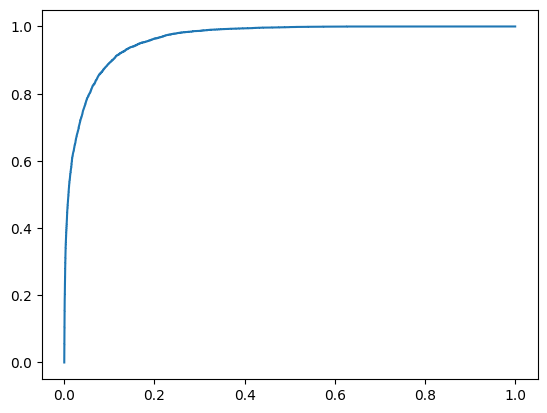

AUC_ROC: 0.9631725203915759


In [28]:
# ROC curve and auc_roc
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

y = data['label'].to_numpy()
scores = data['score'].to_numpy()

fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)

plt.plot(fpr,tpr)
plt.savefig('lfcc.png')
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC_ROC:', auc)

In [26]:
#threshold
fnr = 1 - tpr
eer_threshold = thresholds[np.nanargmin(np.absolute((fnr - fpr)))]
eer_threshold

0.9343316908090316

In [27]:
#eer
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
EER

0.10398860398860399